In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

warnings.filterwarnings('ignore')

Dataset harga rumah jaksel terdiri dari 7 kolom dengan jumlah data yaitu 1000 data. Kolom tersebut terdiri dari :

HARGA : harga dari rumah.
LT : jumlah luas tanah.
LB : jumlah luas bangunan.
JKT : jumlah kamar tidur.
JKM : jumlah kamar mandi.
GRS : ada/tidak ada
KOTA : nama kota.

In [2]:
df = pd.read_excel("../Dataset/DATA RUMAH.xlsx")
df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


In [3]:
df.isnull().sum()
# df.columns.values

NO            0
NAMA RUMAH    0
HARGA         0
LB            0
LT            0
KT            0
KM            0
GRS           0
dtype: int64

In [4]:
X = df.drop(['HARGA', 'NAMA RUMAH'], axis=1)
y = df['HARGA']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [6]:
print (standardized_data)

[[-1.73033675 -0.31803759 -0.09691899 -1.06127231 -0.42830543 -1.27183723]
 [-1.72690695 -0.54303923 -0.55836723 -0.42513876 -0.42830543  0.0524469 ]
 [-1.72347714 -0.05366066  0.06986953 -0.42513876  0.27623608  1.37673103]
 ...
 [ 1.72347714 -0.7736659  -0.04132282 -0.42513876  0.27623608 -0.60969517]
 [ 1.72690695  0.46946815  2.0490933   1.4832619   0.27623608 -1.27183723]
 [ 1.73033675  0.8069706   1.07060065  1.4832619   0.27623608  0.0524469 ]]


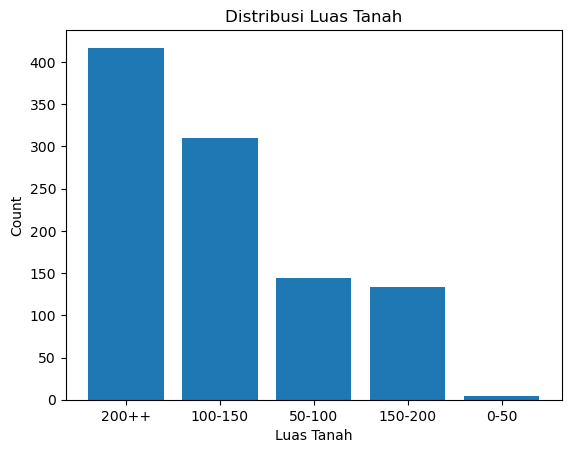

In [7]:
bins = [0, 50, 100, 150, 200,np.inf]
labels = ['0-50', '50-100', '100-150', '150-200', '200++']
df_luastanah = pd.cut(df['LT'], bins=bins, labels=labels)

# Count the number of occurrences of each bin
counts = df_luastanah.value_counts()

# Plot the counts
plt.bar(counts.index, counts.values)
plt.xlabel('Luas Tanah')
plt.ylabel('Count')
plt.title('Distribusi Luas Tanah')
plt.show()

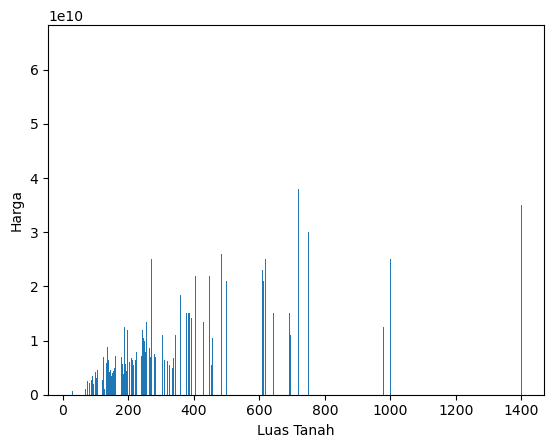

In [8]:
plt.bar( df['LT'],df['HARGA'])
plt.xlabel('Luas Tanah')
plt.ylabel('Harga')
# plt.title('Distribusi Luas Tanah')
plt.show()

In [9]:
df = df.loc[:,['LB', 'LT', 'KT', 'KM', 'GRS', 'HARGA']]
df.head()

,LB,LT,KT,KM,GRS,HARGA
0,220,220,3,3,0,3800000000
1,180,137,4,3,2,4600000000
2,267,250,4,4,4,3000000000
3,40,25,2,2,0,430000000
4,400,355,6,5,3,9000000000


In [10]:
df.describe()

,LB,LT,KT,KM,GRS,HARGA
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1.010000e+03
mean,276.539604,237.432673,4.668317,3.607921,1.920792,7.628987e+09
std,177.864557,179.957604,1.572776,1.420066,1.510998,7.340946e+09
min,40.000000,25.000000,2.000000,1.000000,0.000000,4.300000e+08
25%,150.000000,130.000000,4.000000,3.000000,1.000000,3.262500e+09
50%,216.500000,165.000000,4.000000,3.000000,2.000000,5.000000e+09
75%,350.000000,290.000000,5.000000,4.000000,2.000000,9.000000e+09
max,1126.000000,1400.000000,10.000000,10.000000,10.000000,6.500000e+10


In [11]:
# group LT into 4 categories (0-50, 50-100, 100-150, and more than 150)
# df['LT'] = pd.cut(df['LT'], bins=[0, 50, 100, 150, np.inf], labels=['0-50', '50-100', '100-150', '150+'])
# df.head()


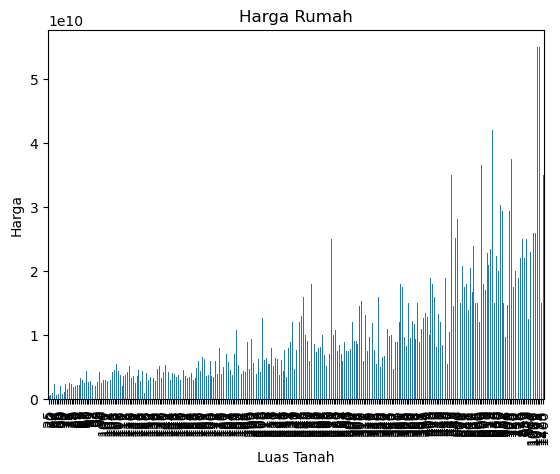

In [12]:


# create bar chart for harga by luas tanah
df.groupby('LT')['HARGA'].mean().plot(kind='bar')
plt.title('Harga Rumah')
plt.xlabel('Luas Tanah')
plt.ylabel('Harga')
plt.show()




